In [ ]:
'''
Load the Baseball_salary.csv as your source. 
Consider Salary as the output and the rest of the columns as input.
Perform data analysis on this dataset using the following steps:
    o Clean the data by removing nulls and text data (categorical data if any)
    o Find descriptive statistics and comment on what columns may need further pre-processing such as normalization or standardization.
    o plot the histograms for all columns.
    o Does any column need to be log transformed? Explain the reason for your decision.
    o Choose the log of salary as your output instead of salary and insert the logSalary in the dataframe in place of the salary column.
    o Perform normalization and standardization on the input columns and determine if any of these transformations could potentially improve the modeling phase.
    o Perform correlation analysis and identify the independent and correlated columns.
    o Plot the scatter plots and determine if there is any linear and nonlinear relationship between the columns of the data.

Upload your code as a .py file and the results and explanations as a word file onto Canvas 
before the deadline.
'''


In [85]:
#Import Python Libraries

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filename = 'Baseball_salary.csv'
data = pd.read_csv(filename)

In [3]:
data.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [4]:
data.dtypes

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

# Clean the data by removing nulls and text data (categorical data if any)

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data_num = data.select_dtypes(include=numerics)


In [6]:
data_num.dtypes

AtBat        int64
Hits         int64
HmRun        int64
Runs         int64
RBI          int64
Walks        int64
Years        int64
CAtBat       int64
CHits        int64
CHmRun       int64
CRuns        int64
CRBI         int64
CWalks       int64
PutOuts      int64
Assists      int64
Errors       int64
Salary     float64
dtype: object

In [7]:
data_num.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5


In [8]:
data_num.isna().any()

AtBat      False
Hits       False
HmRun      False
Runs       False
RBI        False
Walks      False
Years      False
CAtBat     False
CHits      False
CHmRun     False
CRuns      False
CRBI       False
CWalks     False
PutOuts    False
Assists    False
Errors     False
Salary      True
dtype: bool

In [43]:
data_num['Salary'].isna().count()

322

In [44]:
data_num[data_num['Salary'].isna()].head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,NaN
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,NaN
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,NaN


In [86]:
data_clean = data_num[~data_num['Salary'].isna()].copy(deep=True)

In [46]:
data_clean.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


# Find descriptive statistics and comment on what columns may need further pre-processing such as normalization or standardization.

In [87]:
data_clean.describe()

# Looks like most columns have
    

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


#    plot the histograms for all columns.

array([[<AxesSubplot:title={'center':'AtBat'}>,
        <AxesSubplot:title={'center':'Hits'}>,
        <AxesSubplot:title={'center':'HmRun'}>,
        <AxesSubplot:title={'center':'Runs'}>],
       [<AxesSubplot:title={'center':'RBI'}>,
        <AxesSubplot:title={'center':'Walks'}>,
        <AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'CAtBat'}>],
       [<AxesSubplot:title={'center':'CHits'}>,
        <AxesSubplot:title={'center':'CHmRun'}>,
        <AxesSubplot:title={'center':'CRuns'}>,
        <AxesSubplot:title={'center':'CRBI'}>],
       [<AxesSubplot:title={'center':'CWalks'}>,
        <AxesSubplot:title={'center':'PutOuts'}>,
        <AxesSubplot:title={'center':'Assists'}>,
        <AxesSubplot:title={'center':'Errors'}>],
       [<AxesSubplot:title={'center':'Salary'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

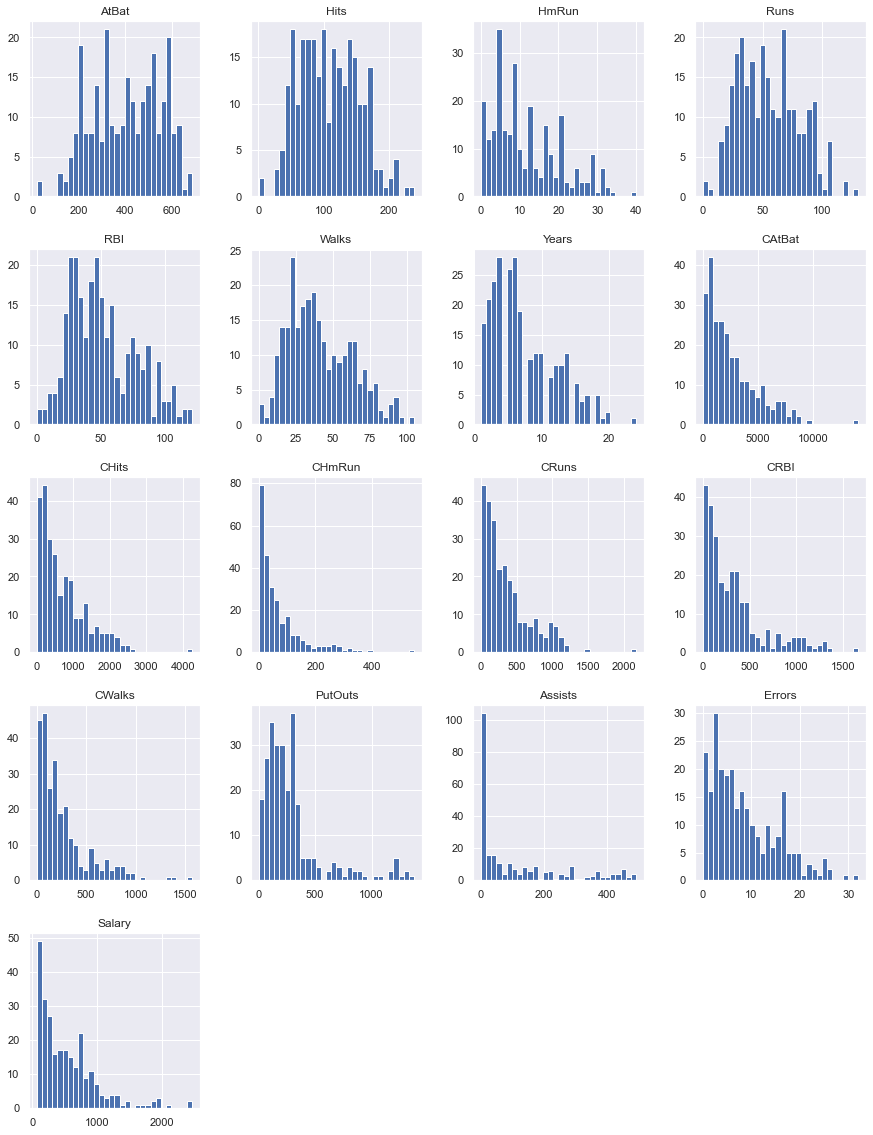

In [48]:
data_clean.hist(figsize=(15, 20), bins = 30)

# # box plot

<AxesSubplot:>

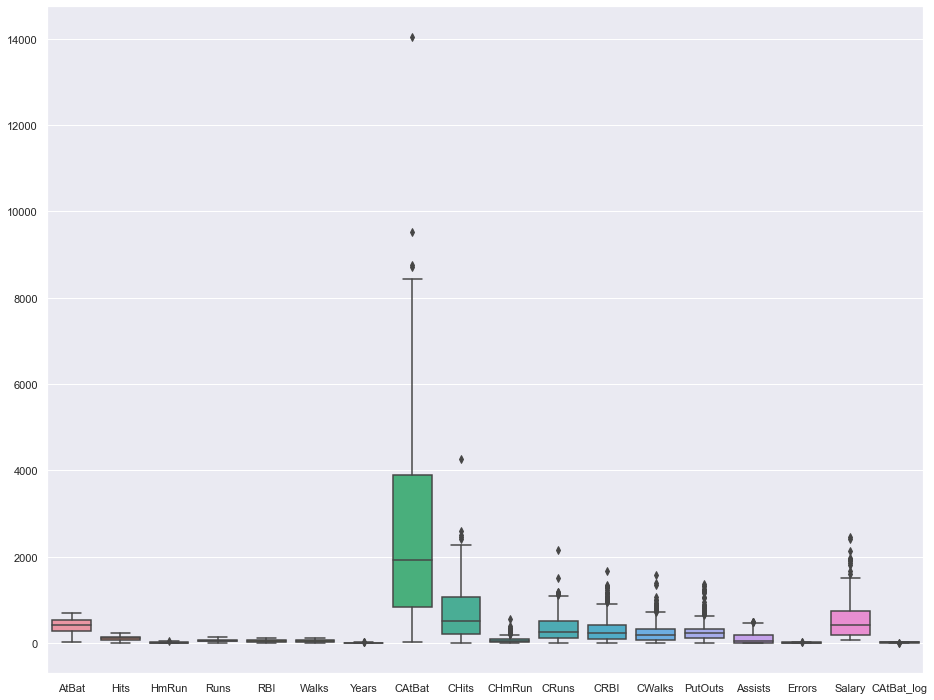

In [25]:
sns.set(rc={'figure.figsize':(15.7,12.27)})
sns.boxplot(data=data_clean)

# Does any column need to be log transformed? Explain the reason for your decision.

In [88]:
# Based on teh histogramsn, there are few columns that are right-skewed, namely "Assists", "CHmRun", "CHits", "CRuns"

# Below is an example of "CHmRun" being log tranformed 

data_log = data_clean.copy(deep=True)

log_cols = ["Assists", "CHmRun", "CHits", "CRuns"]

for cl in log_cols:
    log_tr_col =  cl
    log_new_col = log_tr_col+'_log'

    data_clean[log_new_col] = np.log2(data_clean[log_tr_col]+0.001)


[Text(0.5, 1.0, 'Residual Raw')]

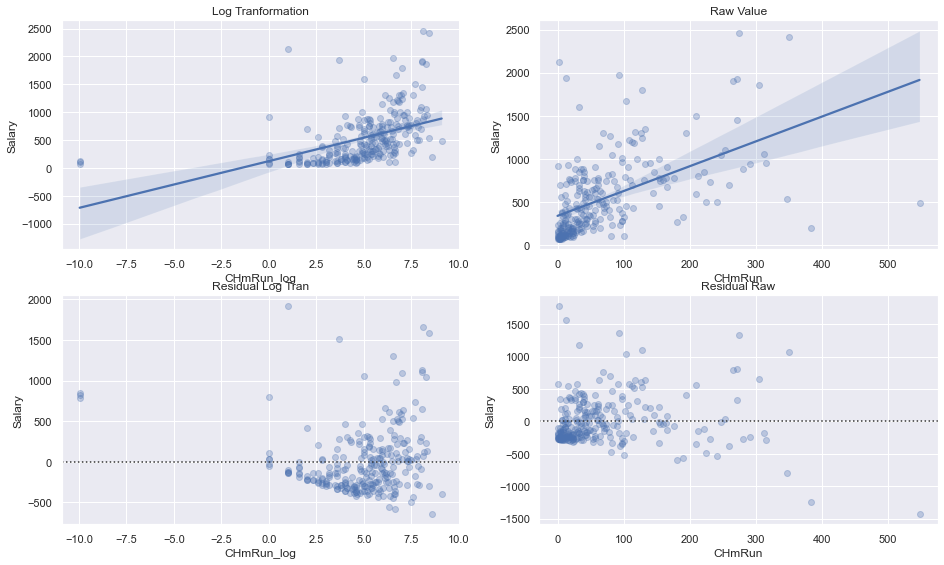

In [89]:
# Plots of "CHmRun" vs. "Salary" with after and before log tranformation and the residual plots
# It shows residuals are around 0, indicating better fitness by a linear model

log_tr_col =  "CHmRun"
log_new_col = log_tr_col+'_log'

fig, ax =plt.subplots(2,2)

sns.regplot(x=log_new_col, y='Salary', scatter_kws={'alpha':0.3}, data=data_clean,ax=ax[0,0]).set(title='Log Tranformation')
sns.regplot(x=log_tr_col,  y='Salary', scatter_kws={'alpha':0.3}, data=data_clean,ax=ax[0,1]).set(title='Raw Value')

sns.residplot(data=data_clean, x=log_new_col, y='Salary', scatter_kws={'alpha':0.3}, ax=ax[1,0]).set(title='Residual Log Tran')
sns.residplot(data=data_clean, x=log_tr_col,  y='Salary', scatter_kws={'alpha':0.3}, ax=ax[1,1]).set(title='Residual Raw')


[Text(0.5, 1.0, 'Residual Raw')]

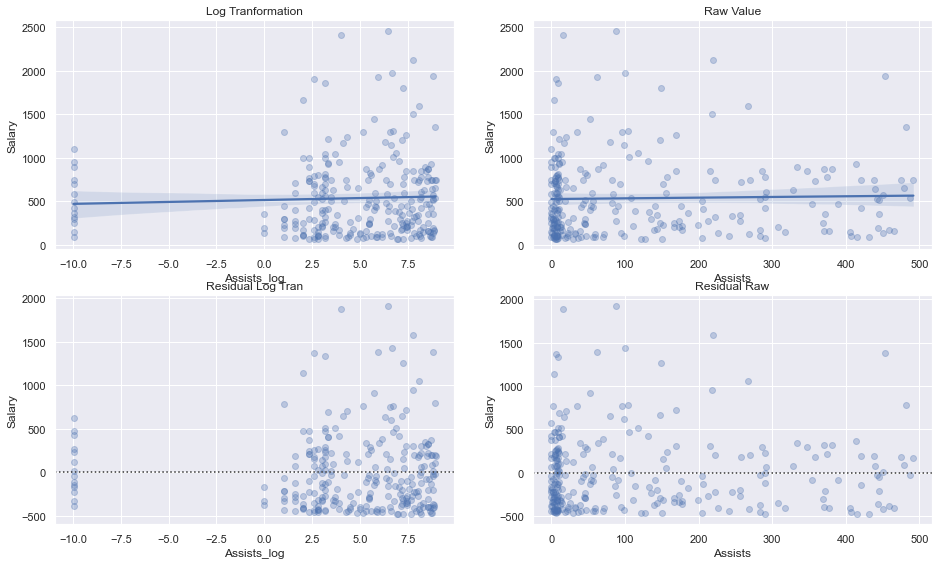

In [90]:
# Plots of "Assists" vs. "Salary" with after and before log tranformation and the residual plots
# It shows residuals are around 0, indicating better fitness by a linear model

log_tr_col =  "Assists"
log_new_col = log_tr_col+'_log'

fig, ax =plt.subplots(2,2)

sns.regplot(x=log_new_col, y='Salary', scatter_kws={'alpha':0.3}, data=data_clean,ax=ax[0,0]).set(title='Log Tranformation')
sns.regplot(x=log_tr_col,  y='Salary', scatter_kws={'alpha':0.3}, data=data_clean,ax=ax[0,1]).set(title='Raw Value')

sns.residplot(data=data_clean, x=log_new_col, y='Salary', scatter_kws={'alpha':0.3}, ax=ax[1,0]).set(title='Residual Log Tran')
sns.residplot(data=data_clean, x=log_tr_col,  y='Salary', scatter_kws={'alpha':0.3}, ax=ax[1,1]).set(title='Residual Raw')


# Choose the log of salary as your output instead of salary and insert the logSalary in the dataframe in place of the salary column.



In [91]:
data_clean['logSalary'] = np.log2(data_clean['Salary'])

In [92]:
data_clean.head(2)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,Salary,Assists_log,CHmRun_log,CHits_log,CRuns_log,logSalary
1,315,81,7,24,38,39,14,3449,835,69,...,375,632,43,10,475.0,5.426298,6.108545,9.705634,8.326434,8.891784
2,479,130,18,66,72,76,3,1624,457,63,...,263,880,82,14,480.0,6.357570,5.977303,8.836054,7.807361,8.906891


# Perform normalization and standardization on the input columns and determine if any of these transformations could potentially improve the modeling phase.


In [93]:
cols = data_clean.columns.to_list()
cols.remove('Salary')
cols.remove('logSalary')
print(cols)
    


['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors', 'Assists_log', 'CHmRun_log', 'CHits_log', 'CRuns_log']


In [94]:
data_norm = data_clean.copy(deep=True)
#cols = X_norm.columns.to_list()

for column in cols:
    data_norm[column] = (data_norm[column] - data_norm[column].min()) / (data_norm[column].max() - data_norm[column].min())    

    

In [105]:
data_norm.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,Salary,Assists_log,CHmRun_log,CHits_log,CRuns_log,logSalary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,0.575812,0.450755,0.290494,0.421117,0.425510,0.391563,0.274426,0.188011,0.168906,0.126350,...,0.165665,0.211119,0.241383,0.268536,535.925882,0.771228,0.781966,0.677761,0.674683,8.551173
std,0.220520,0.190402,0.218928,0.196460,0.213907,0.206839,0.208418,0.162932,0.152446,0.149996,...,0.168726,0.203293,0.294879,0.206455,451.118681,0.223141,0.131657,0.157238,0.158443,1.282833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,67.500000,0.000000,0.000000,0.000000,0.000000,6.076816
25%,0.394461,0.297468,0.125000,0.257692,0.247934,0.219048,0.130435,0.058679,0.048918,0.027372,...,0.044728,0.082426,0.016260,0.093750,190.000000,0.685729,0.727702,0.569622,0.567530,7.569856
50%,0.589820,0.430380,0.225000,0.400000,0.388430,0.352381,0.217391,0.136241,0.120414,0.072993,...,0.110543,0.162672,0.091463,0.218750,425.000000,0.817507,0.801925,0.697257,0.691018,8.731319
75%,0.758982,0.592827,0.450000,0.561538,0.586777,0.542857,0.391304,0.275866,0.246943,0.168796,...,0.209265,0.234205,0.390244,0.406250,750.000000,0.928153,0.865365,0.799734,0.789509,9.550747
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2460.000000,1.000000,1.000000,1.000000,1.000000,11.264443


array([[<AxesSubplot:title={'center':'AtBat'}>,
        <AxesSubplot:title={'center':'Hits'}>,
        <AxesSubplot:title={'center':'HmRun'}>,
        <AxesSubplot:title={'center':'Runs'}>,
        <AxesSubplot:title={'center':'RBI'}>],
       [<AxesSubplot:title={'center':'Walks'}>,
        <AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'CAtBat'}>,
        <AxesSubplot:title={'center':'CHits'}>,
        <AxesSubplot:title={'center':'CHmRun'}>],
       [<AxesSubplot:title={'center':'CRuns'}>,
        <AxesSubplot:title={'center':'CRBI'}>,
        <AxesSubplot:title={'center':'CWalks'}>,
        <AxesSubplot:title={'center':'PutOuts'}>,
        <AxesSubplot:title={'center':'Assists'}>],
       [<AxesSubplot:title={'center':'Errors'}>,
        <AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Assists_log'}>,
        <AxesSubplot:title={'center':'CHmRun_log'}>,
        <AxesSubplot:title={'center':'CHits_log'}>],
       [<AxesSubp

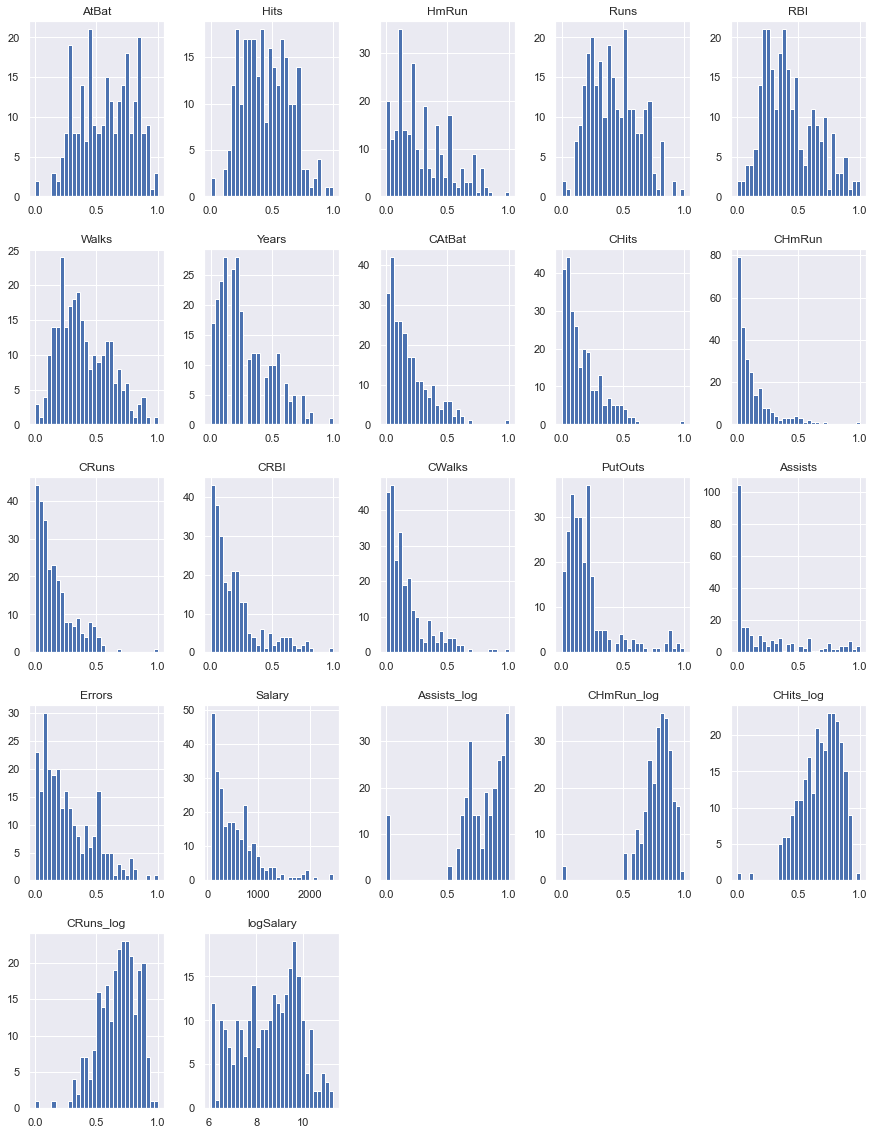

In [95]:
data_norm.hist(figsize=(15, 20), bins = 30)

In [98]:
data_standard = data_clean.copy(deep=True)

for column in cols:
    data_standard[column] = (data_standard[column] - data_standard[column].mean()) / data_standard[column].std()
    


In [100]:
data_standard.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,...,CWalks,PutOuts,Assists,Errors,Salary,Assists_log,CHmRun_log,CHits_log,CRuns_log,logSalary
count,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,...,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,263.000000,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,263.000000
mean,6.754209e-18,8.527188e-17,1.625231e-16,-5.403367e-17,9.287037e-17,1.667445e-17,-1.435269e-17,4.221380e-17,5.909932e-17,9.223716e-17,...,9.601002e-17,7.091919e-17,5.994360e-17,1.080673e-16,535.925882,-3.343333e-16,4.964541e-16,-5.361153e-16,-1.113600e-15,8.551173
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,451.118681,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.282833
min,-2.611159e+00,-2.367382e+00,-1.326896e+00,-2.143526e+00,-1.989231e+00,-1.893082e+00,-1.316707e+00,-1.153924e+00,-1.107971e+00,-8.423550e-01,...,-9.818610e-01,-1.038496e+00,-8.185827e-01,-1.300698e+00,67.500000,-3.456231e+00,-5.939414e+00,-4.310421e+00,-4.258198e+00,6.076816
25%,-8.223806e-01,-8.050667e-01,-7.559313e-01,-8.318481e-01,-8.301561e-01,-8.340557e-01,-6.908745e-01,-7.937800e-01,-7.870821e-01,-6.598679e-01,...,-7.167656e-01,-6.330444e-01,-7.634410e-01,-8.466046e-01,190.000000,-3.831626e-01,-4.121684e-01,-6.877428e-01,-6.762865e-01,7.569856
50%,6.352313e-02,-1.070108e-01,-2.991595e-01,-1.074889e-01,-1.733470e-01,-1.894308e-01,-2.736529e-01,-3.177421e-01,-3.180908e-01,-3.557227e-01,...,-3.266966e-01,-2.383093e-01,-5.084103e-01,-2.411471e-01,425.000000,2.073973e-01,1.515927e-01,1.239942e-01,1.030996e-01,8.731319
75%,8.306275e-01,7.461686e-01,7.285771e-01,7.147566e-01,7.539127e-01,7.314619e-01,5.607902e-01,5.392135e-01,5.119004e-01,2.829822e-01,...,2.584068e-01,1.135586e-01,5.048198e-01,6.670392e-01,750.000000,7.032527e-01,6.334515e-01,7.757211e-01,7.247144e-01,9.550747
max,1.923581e+00,2.884657e+00,3.240822e+00,2.946566e+00,2.685704e+00,2.941604e+00,3.481341e+00,4.983618e+00,5.451737e+00,5.824508e+00,...,4.944915e+00,3.880510e+00,2.572636e+00,3.542962e+00,2460.000000,1.025233e+00,1.656070e+00,2.049375e+00,2.053211e+00,11.264443


array([[<AxesSubplot:title={'center':'AtBat'}>,
        <AxesSubplot:title={'center':'Hits'}>,
        <AxesSubplot:title={'center':'HmRun'}>,
        <AxesSubplot:title={'center':'Runs'}>,
        <AxesSubplot:title={'center':'RBI'}>],
       [<AxesSubplot:title={'center':'Walks'}>,
        <AxesSubplot:title={'center':'Years'}>,
        <AxesSubplot:title={'center':'CAtBat'}>,
        <AxesSubplot:title={'center':'CHits'}>,
        <AxesSubplot:title={'center':'CHmRun'}>],
       [<AxesSubplot:title={'center':'CRuns'}>,
        <AxesSubplot:title={'center':'CRBI'}>,
        <AxesSubplot:title={'center':'CWalks'}>,
        <AxesSubplot:title={'center':'PutOuts'}>,
        <AxesSubplot:title={'center':'Assists'}>],
       [<AxesSubplot:title={'center':'Errors'}>,
        <AxesSubplot:title={'center':'Salary'}>,
        <AxesSubplot:title={'center':'Assists_log'}>,
        <AxesSubplot:title={'center':'CHmRun_log'}>,
        <AxesSubplot:title={'center':'CHits_log'}>],
       [<AxesSubp

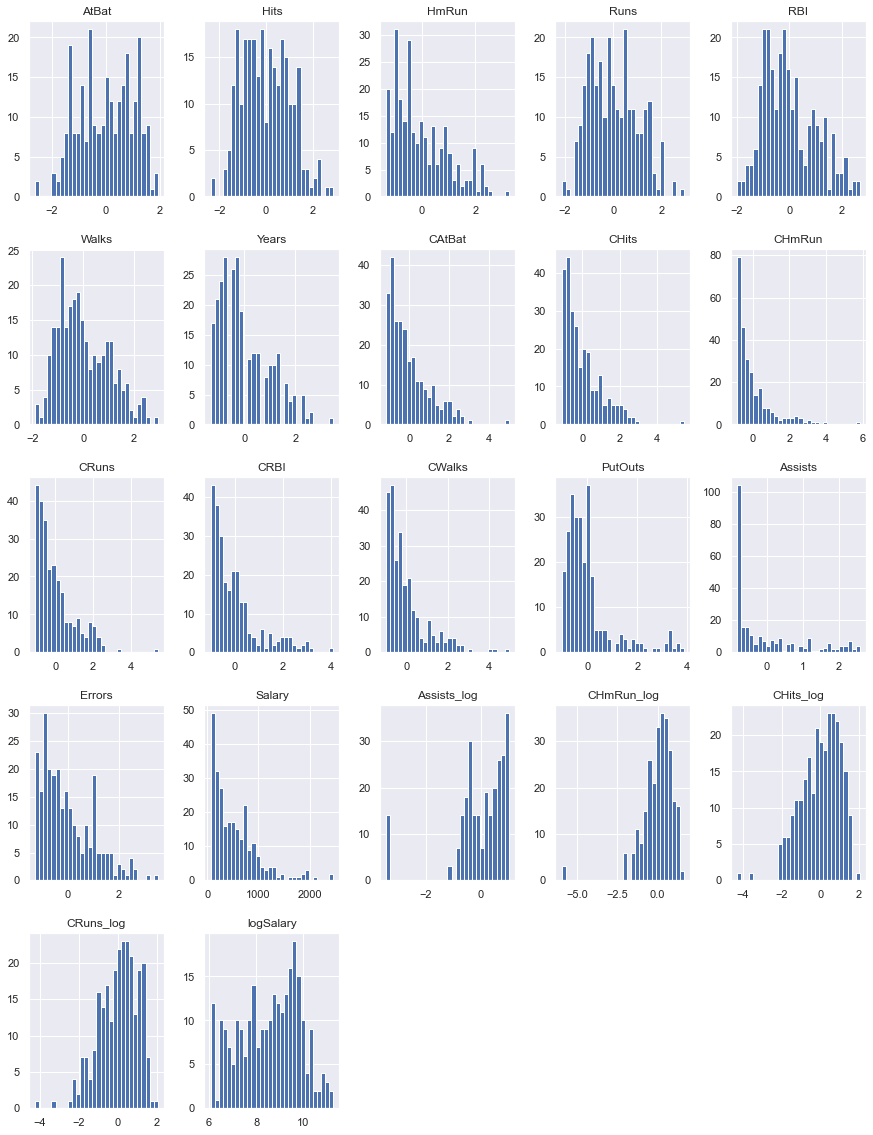

In [101]:
data_standard.hist(figsize=(15, 20), bins = 30)

#  Perform correlation analysis and identify the independent and correlated columns.

<AxesSubplot:>

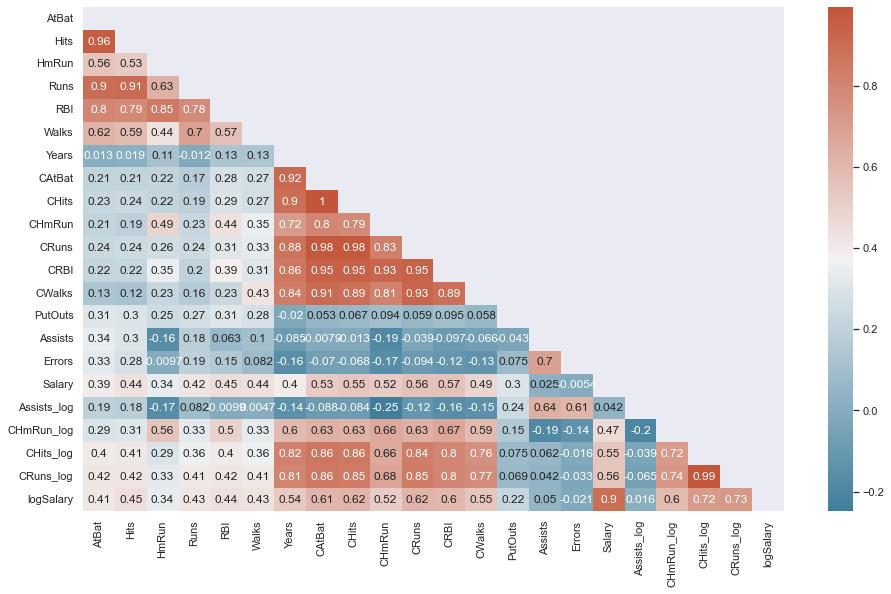

In [102]:
corr = data_clean.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(15.7,9.27)})
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

##
# It seems a lot fo columns are very correlated. 
# Most importantly, the fields  'CHits' and 'CAtBat' seems to have coorelation cofficient as 1, meaning they are perfectly correlated
# "CRuns" and "CHits" are also strongly correlated, same as "CRuns" and "CAtBat"
#


[Text(0.5, 1.0, 'Correlation')]

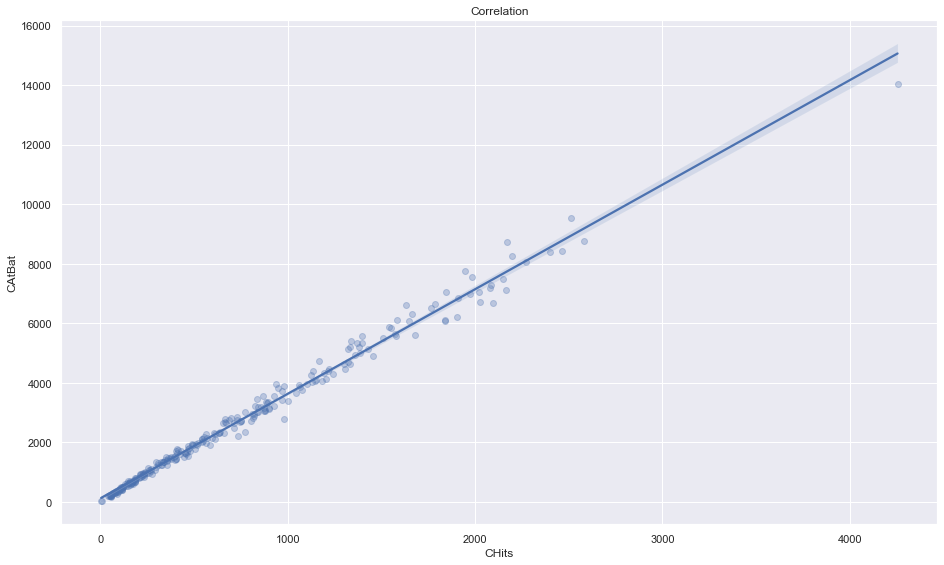

In [104]:
sns.regplot(x='CHits', y='CAtBat', scatter_kws={'alpha':0.3}, data=data_clean).set(title='Correlation')

# Plot the scatter plots and determine if there is any linear and nonlinear relationship between the columns of the data.



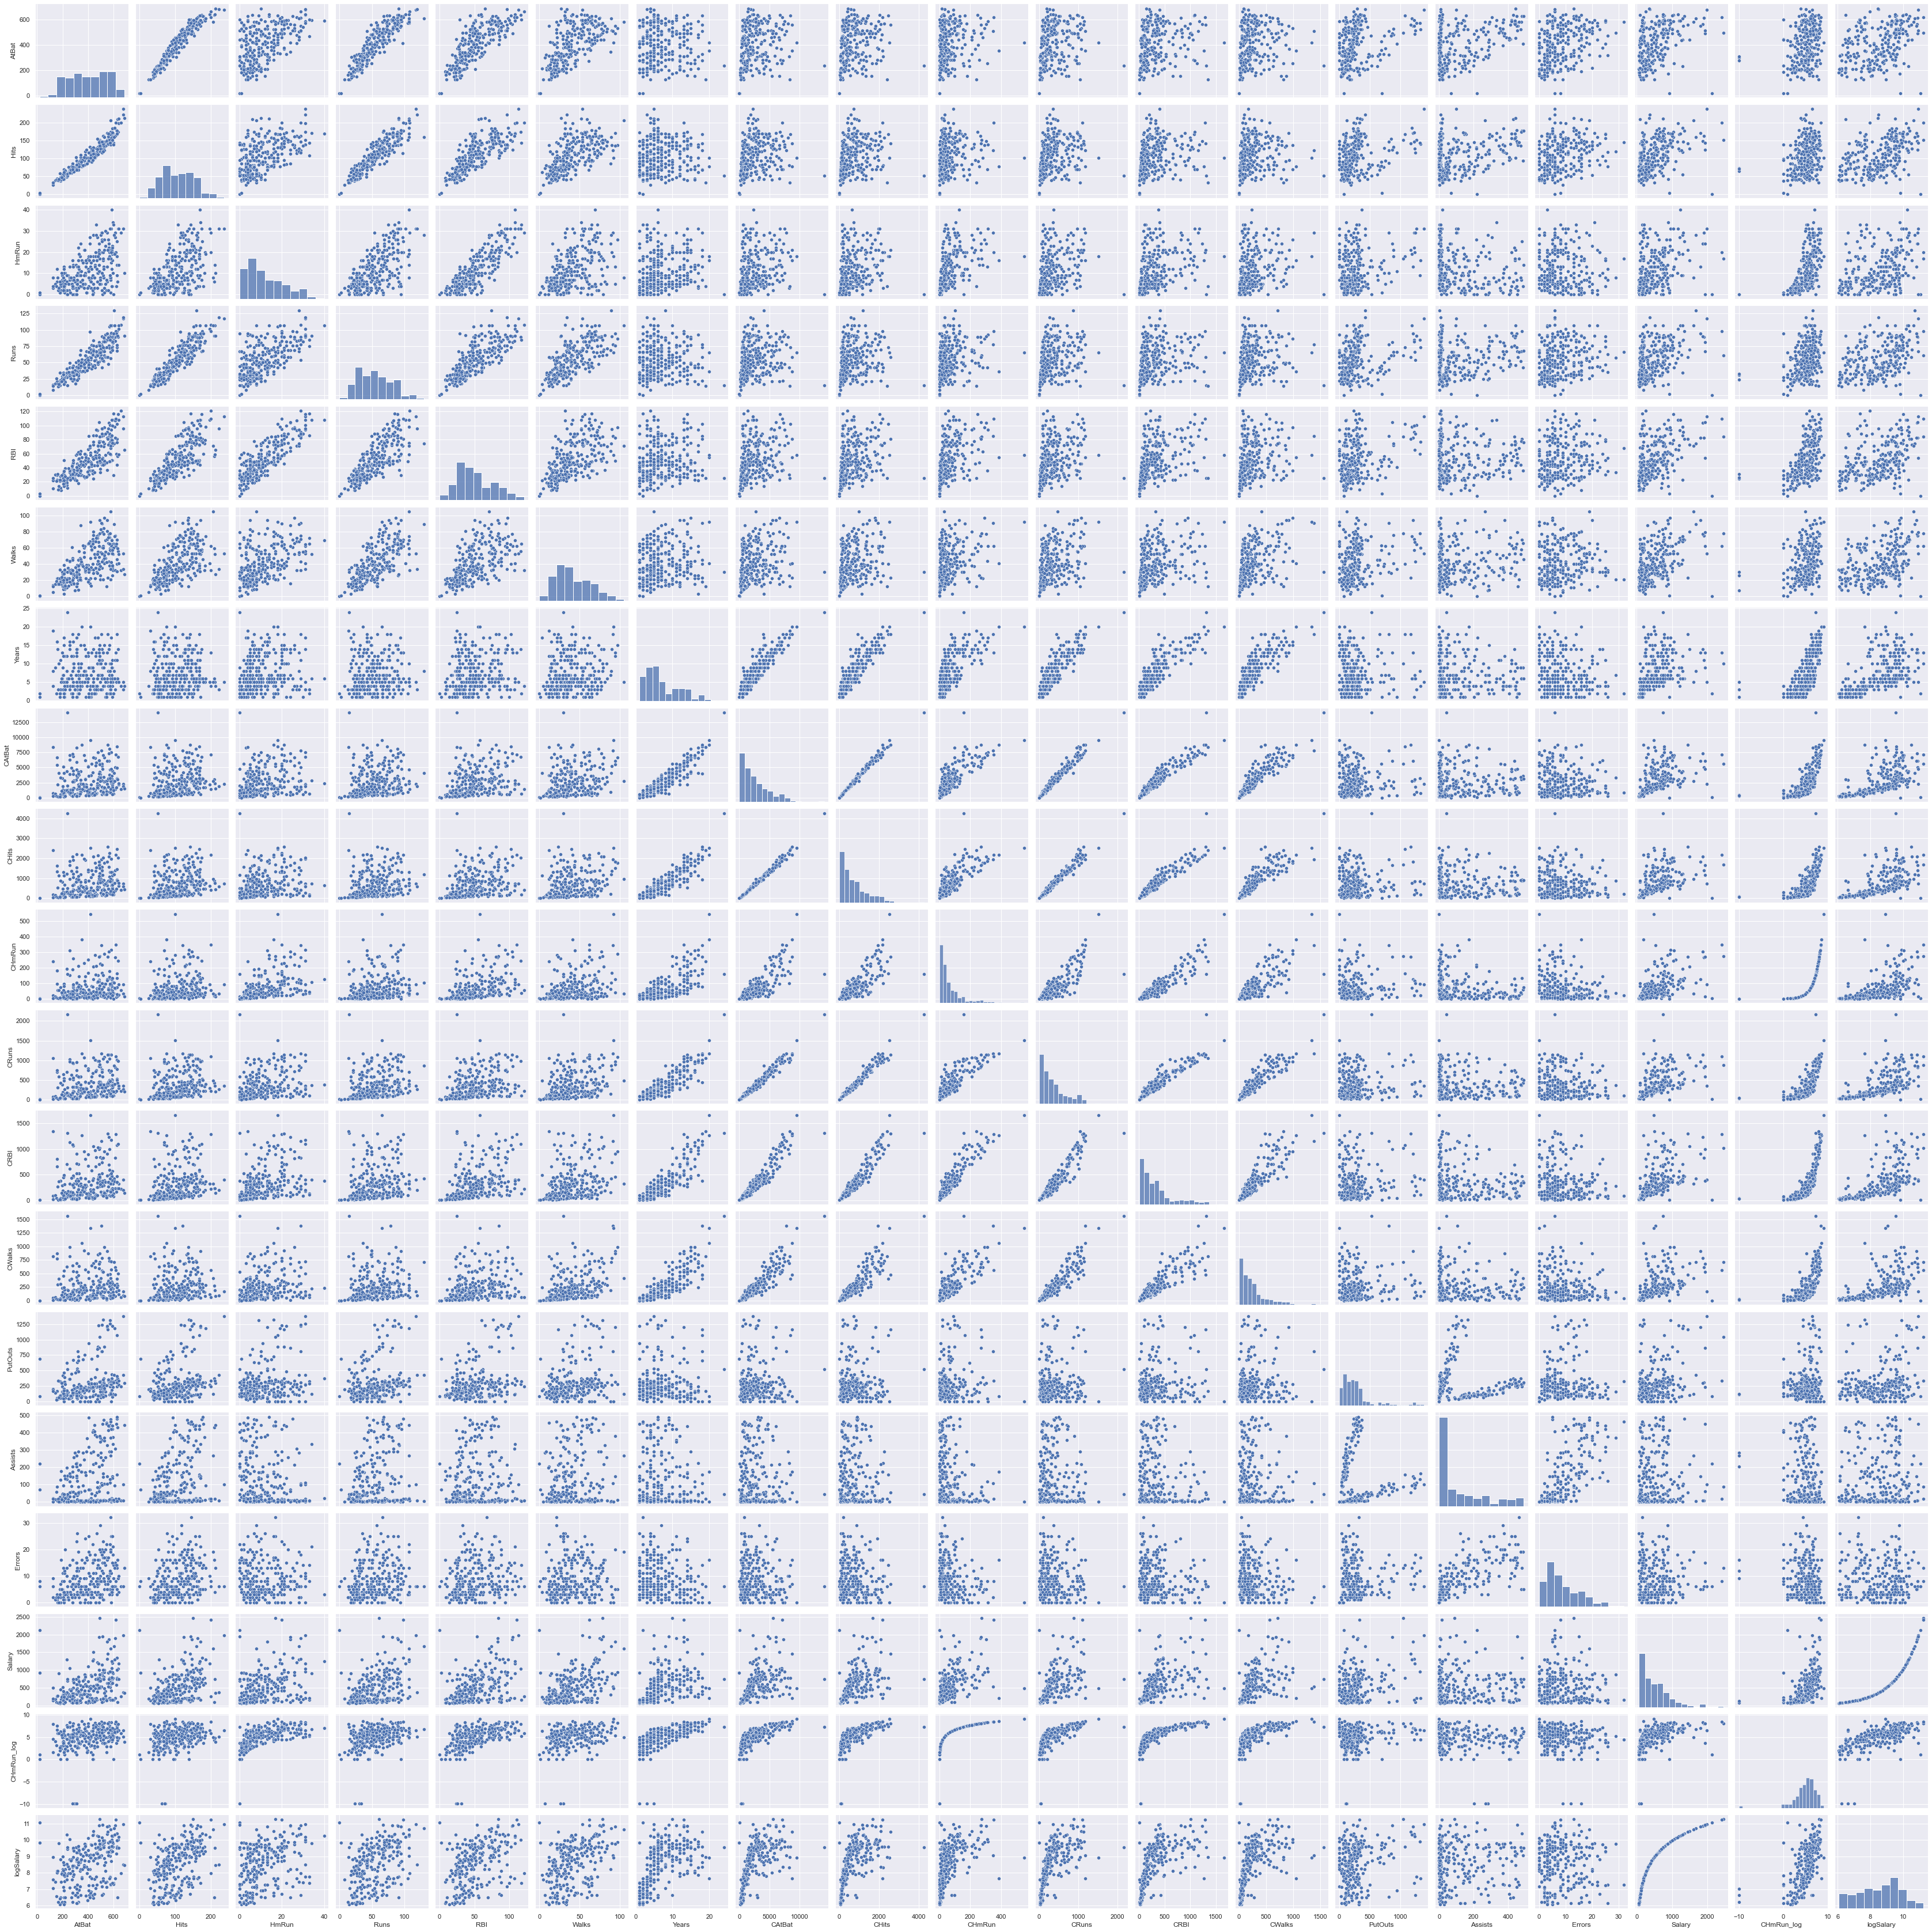

In [65]:
sns.pairplot(data_clean)